In [2]:
from utils_analysis import *

# Standard
import torch
import numpy as np
import pandas as pd
import os
import sys; sys.path.append("../")

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.reload_library()
plt.style.use('thesis_style')

Making run overview, based on dir: /home/cbarkhof/code-thesis/NewsVAE/Runs
Making run overview of /home/cbarkhof/code-thesis/NewsVAE/Runs, in /home/cbarkhof/code-thesis/NewsVAE/final-analysis/Runs_run_overview.csv
Reading last checkpoint and extracting pareto dict and saving it to a pickle.
Reading all pareto dicts and calculating best checkpoint, saving it to a csv
--------------------------------------------------
Making run overview, based on dir: /home/cbarkhof/code-thesis/NewsVAE/Runs-ablation
Making run overview of /home/cbarkhof/code-thesis/NewsVAE/Runs-ablation, in /home/cbarkhof/code-thesis/NewsVAE/final-analysis/Runs-ablation_run_overview.csv
Reading last checkpoint and extracting pareto dict and saving it to a pickle.
Reading all pareto dicts and calculating best checkpoint, saving it to a csv
--------------------------------------------------
Making run overview, based on dir: /home/cbarkhof/code-thesis/NewsVAE/Runs-target-rate
Making run overview of /home/cbarkhof/code-the

In [3]:
EXP_NAME = "Runs-target-rate"
VAL_BATCHES = 10

df = read_overview_csv(EXP_NAME)
df = df.sort_values("target_rate")
df

,run_name,mech_string,dataset_name,dataset,clean_name,target_rate,optimisation,drop,mem,emb,matrix
2,2021-05-21-rate-exp-fb-0.125-ptb-mem-emb-run-1...,mem+emb,PTB,PTB,PTB | FB | mem+emb | Target rate: 0.125,0.125,FB-0.5,0.0,True,True,False
0,2021-05-20-rate-exp-fb-0.25-ptb-mem-emb-run-12...,mem+emb,PTB,PTB,PTB | FB | mem+emb | Target rate: 0.25,0.250,FB-0.5,0.0,True,True,False
1,2021-05-20-rate-exp-fb-0.5-ptb-mem-emb-run-22:...,mem+emb,PTB,PTB,PTB | FB | mem+emb | Target rate: 0.5,0.500,FB-0.5,0.0,True,True,False
4,2021-05-22-rate-exp-fb-0.75-ptb-mem-emb-run-12...,mem+emb,PTB,PTB,PTB | FB | mem+emb | Target rate: 0.75,0.750,FB-0.5,0.0,True,True,False
3,2021-05-21-rate-exp-fb-1.0-ptb-mem-emb-run-06:...,mem+emb,PTB,PTB,PTB | FB | mem+emb | Target rate: 1.0,1.000,FB-0.5,0.0,True,True,False


In [4]:
rate_dist_elbo = {}

for row_i, row in df.iterrows():
    run_name = row["run_name"]
    tr = row["target_rate"]
    stats = get_sum_stats_run(run_name, exp_name=EXP_NAME, val_batches=VAL_BATCHES)
    
    rate_dist_elbo[tr] = {
        "run_name": run_name,
        "clean_name": row["clean_name"],
        "distortion": np.mean(stats["reconstruction_loss"]),
        "rate": np.mean(stats["kl_analytical"]),
        "elbo": np.mean(stats["elbo"])
    }
    
pd.DataFrame(rate_dist_elbo).transpose().drop("run_name", axis=1)
    
#     print(stats.keys())
#     for k, v in stats.items():
#         if torch.is_tensor(v):
#             print(k, v.shape)
#         else:
#             print(k, type(v), len(v))
#     break

,clean_name,distortion,rate,elbo
0.125,PTB | FB | mem+emb | Target rate: 0.125,93.1909,2.73695,-95.9279
0.250,PTB | FB | mem+emb | Target rate: 0.25,92.3598,6.19673,-98.5566
0.500,PTB | FB | mem+emb | Target rate: 0.5,89.8782,12.1344,-102.013
0.750,PTB | FB | mem+emb | Target rate: 0.75,86.3918,19.49,-105.882
1.000,PTB | FB | mem+emb | Target rate: 1.0,83.8655,26.0925,-109.958


In [26]:
target_rates = [t for t in rate_dist_elbo]
rates = [s["rate"] for _, s in rate_dist_elbo.items()]
elbos = [s["elbo"] for _, s in rate_dist_elbo.items()]
distortions = [s["distortion"] for _, s in rate_dist_elbo.items()]

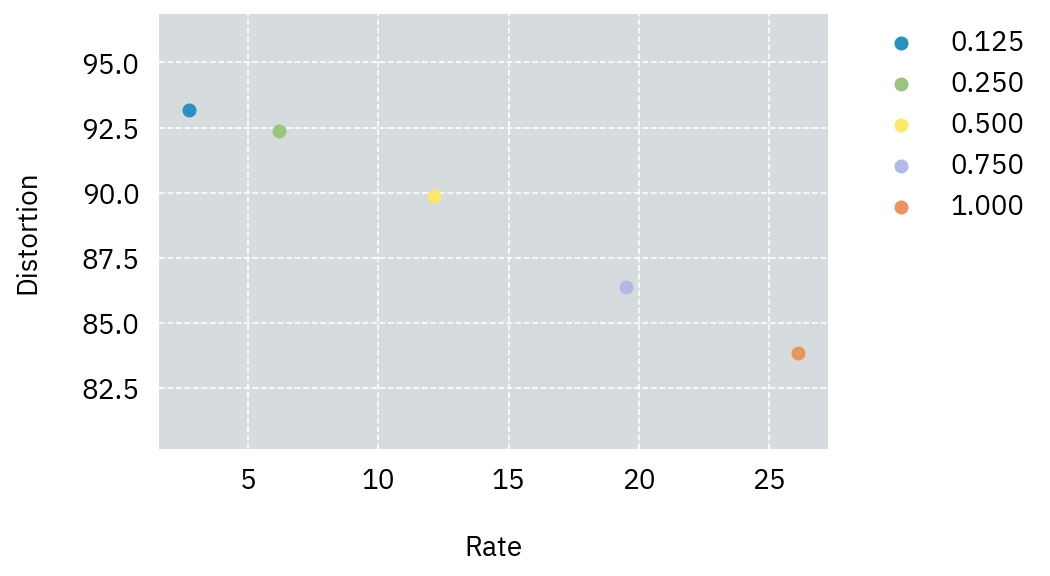

In [39]:
for i, tr in enumerate(target_rates):
    plt.scatter(rates[i], distortions[i], label=f"{tr:.3f}")

    plt.axis('equal')
plt.xlabel("Rate")
plt.ylabel("Distortion")
plt.legend(loc=(1.05, 0.5))

plt.show()

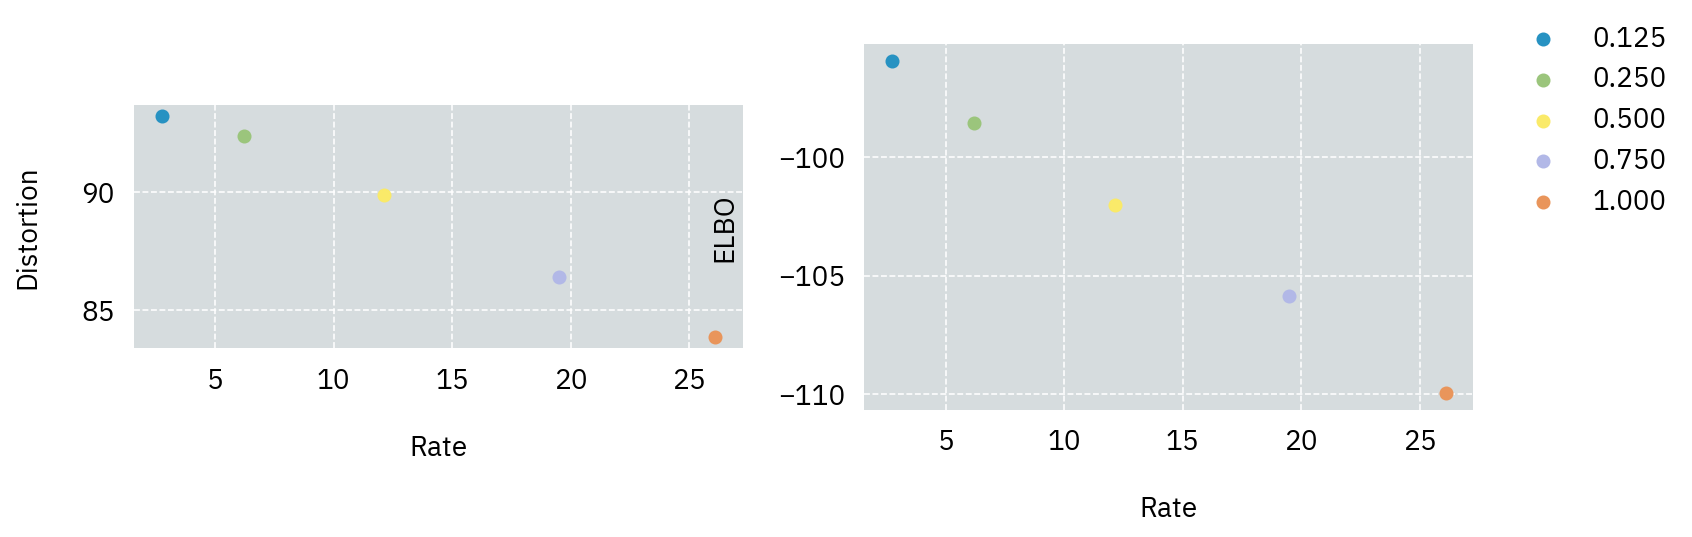

In [40]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

for i, tr in enumerate(target_rates):
    axs[0].scatter(rates[i], distortions[i], label=f"{tr:.3f}")
axs[0].set_aspect('equal')
axs[0].set_xlabel("Rate")
axs[0].set_ylabel("Distortion")
# axs[0].legend(loc=(1.05, 0.5))

for i, tr in enumerate(target_rates):
    axs[1].scatter(rates[i], elbos[i], label=f"{tr:.3f}")
axs[1].set_aspect('equal')
axs[1].set_xlabel("Rate")
axs[1].set_ylabel("ELBO")
axs[1].legend(loc=(1.05, 0.5))

plt.show()